# Principal Component analysis

Up until now, we have been looking in depth at supervised learning estimators: those estimators that predict labels based on labeled training data. Here we begin looking at several unsupervised estimators, which can highlight interesting aspects of the data without reference to any known labels.

In this section, we explore what is perhaps one of the most broadly used of unsupervised algorithms, principal component analysis (PCA). PCA is fundamentally a dimensionality reduction algorithm, but it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more. After a brief conceptual discussion of the PCA algorithm, we will see a couple examples of these further applications.

We begin with the standard imports:


In [3]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is afast and flexible unsupervised method for dimensionaltiy reduction in data, which we saw briefly. its behavior is easiest to visualize by looking at a two-dimensional dataset.

In [7]:
X

array([[-0.54304515, -0.1355392 ],
       [-0.88742213, -0.18478595],
       [-1.10132513, -0.61361953],
       ...,
       [ 0.96530554,  0.16257606],
       [ 0.10302654, -0.04238274],
       [ 0.20161109,  0.0428502 ]])

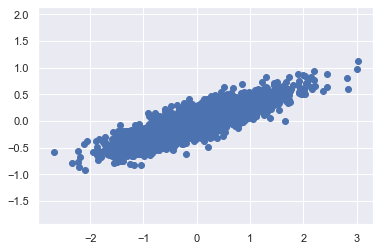

In [6]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 2000)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

By eye, its is clear that there is a nearly linear relationship between the x and y variables. But the problem setting here is slightly different: rather tahn attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *princiapl axes* the data, and using those axes to describe the dataset. Using Scikit-Learn's `PCA` estimator, we ca ncompute this as follows:

In [9]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance":

In [10]:
print(pca.components_)

[[ 0.95158339  0.30739071]
 [ 0.30739071 -0.95158339]]


In [11]:
print(pca.explained_variance_)

[0.74738722 0.02106855]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to defien the direction of the vector, and the "explanied variance" to define the squared-length of the vector:

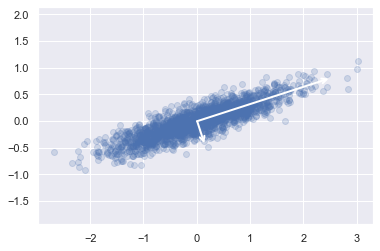

In [13]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)                

# plot data 
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

These vectors represent the *principal axes* of the data, and the length of the vector is an indication of ho "important" that axis is in describing the distribution of the data -- more precisely, it is measure of the variance of the data when projected onto that axis. The projection of each data proint onto hte principal axes are the "principal components" of the data.

If we plot these principal components beside the original data, we see the plots shown here:

![pca_comparison](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.09-PCA-rotation.png)

This transformation from data axes to principal axes is an *affine transformation*, which basically means it iscomposed ofa translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

### PCA for visualizatino: Hand-written digits 

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking ath high-dimensional data. To see this, let's take a quick look at hte application of PCA to the digits.

We start by loading the data:

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

Recall that the data consist of 8x8 pixel images, meaning that htey are 64-dimensional. To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [15]:
pca = PCA(2)
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal componentes of each point to learn about the data:

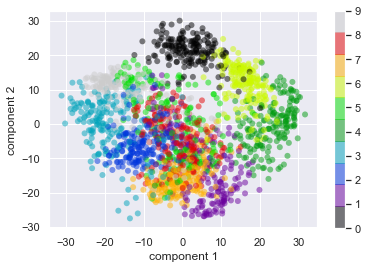

In [25]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()


Recall what these compoments mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along hte directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and ahve done this in an unsupervised manner --hat is, without reference to the labels.